<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## DataFrame Manipulation Lab with Chipotle Data

_Authors: Kiefer Katovich (SF)_

---

This lab is intended to cover a variety of skills for data manipulation in pandas with a challenging dataset.

In addition to python function-writing practice, you will be practicing multiple pandas EDA skills including:
- Data cleaning
- Grouping
- Data summarization and aggregation
- [Pandas split-apply-combine pattern](http://pandas.pydata.org/pandas-docs/stable/groupby.html)
- Basic plotting


In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#### 1. Load the `chipotle.tsv` and examine the data.

In [3]:
chip_file = './datasets/chipotle.tsv'


# the chipotle data is a .tsv, which means "tab separated value". 
# This is just like a csv but the cells are separated by tabs.
# There is an argument in read_csv called delimiter, where you can specify
# the string that separates the tabs:

In [6]:
# A:
chipotle = pd.read_csv(chip_file, sep='\t')
chipotle

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


#### 2. Clean up the price column 

We want the price column to be a numeric float value. Currently it is a string (and has the dollar sign in it).

In [7]:
# A:

chipotle['new_item_price']=chipotle.item_price.str[1:]
chipotle['new_item_price']=chipotle['new_item_price'].astype(float)
chipotle.dtypes
chipotle

,order_id,quantity,item_name,choice_description,item_price,new_item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


#### 3. Make a new categorical column for broader item type

Currently we have many different item types. Make a new column that only has 5 different broad item types. You should have these types in the new column in your DataFrame:

    chips
    drink
    burrito
    taco
    salad
    
(Put the `bowl` items into `burrito` category).

In [11]:
# hint: you'll need to define a function for this. In your function, if 'chips' is in the item, put the item in the 
#chips category

# A:

def categorize_item (order):
    order = order.lower()
    if "chips" in order:
        return "chips"
    elif "taco" in order:
        return "taco"
    elif "burrito" in order or "bowl" in order:
        return "burrito"
    elif "water" in order or "izze" in order or "nantucket nectar" in order or "drink" in order or "soda" in order:
        return "drink"
    elif "salad" in order:
        return "salad"
    
    return order
    
print(categorize_item("doritos burrito"))

#chipotle['categorized_items']=chipotle['item_name'].apply(categorize_item)
# chipotle['categorized_items']
chipotle.head(50)

burrito


,order_id,quantity,item_name,choice_description,item_price,new_item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98,10.98
6,3,1,Side of Chips,NaN,$1.69,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75,11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25,9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25,9.25


In [12]:
chipotle.categorized_items.unique()


AttributeError: 'DataFrame' object has no attribute 'categorized_items'

In [173]:
#chipotle.drop('categorized_items',1,inplace=True)
#chipotle

#### 4. Calculate the total price by `order_id` and add as a new as column `order_total_price`.

There are a variety of different ways you can tackle this problem. One way is to use a groupby to sum the order price and then merge the groupby dataframe onto your original dataframe, renaming the summed price as `order_total_price`.

Hints:

- Merging DataFrames with series doesn't work, you need to merge 2 DataFrames.
- Appending `reset_index()` to a groupby result (or a groupby statement) will return a DataFrame, which can be used to merge on.

In [13]:
# A:
chipotle.groupby("order_id")['new_item_price'].sum()

# chipotle["order_total_price"]=chipotle.groupby("order_id")['new_item_price'].sum()
#hipotle.drop("order_total_price",1,inplace=True)

chipotle



,order_id,quantity,item_name,choice_description,item_price,new_item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


In [14]:
order_id_price = chipotle.groupby("order_id")['new_item_price'].sum()
chipotle["order_total_price"]= chipotle.groupby('order_id').new_item_price.transform('sum')
chipotle

,order_id,quantity,item_name,choice_description,item_price,new_item_price,order_total_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39,11.56
1,1,1,Izze,[Clementine],$3.39,3.39,11.56
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,11.56
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39,11.56
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,16.98
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75,23.50
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75,23.50
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25,28.75
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75,28.75


#### 5. Make an `adjusted_item_price` column to get the price per item.

Some orders contain items with quantities >1. Create a column to identify the unit price for each item.

In [184]:
more_than_1_order = chipotle.quantity >1
chipotle[more_than_1_order]

chipotle['unit_price']=chipotle['new_item_price']/chipotle['quantity']
chipotle


,order_id,quantity,item_name,choice_description,item_price,new_item_price,categorized_items,order_total_price,unit_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39,chips,11.56,2.39
1,1,1,Izze,[Clementine],$3.39,3.39,drink,11.56,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,drink,11.56,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39,chips,11.56,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,burrito,16.98,8.49
...,...,...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75,burrito,23.50,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75,burrito,23.50,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25,burrito,28.75,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75,burrito,28.75,8.75


#### 6. Calculate the mean of adjusted price per broad category.

In [186]:
chipotle.groupby('categorized_items')['unit_price'].mean()

categorized_items
burrito    9.801454
chips      3.237408
drink      1.843308
salad      8.703636
taco       9.504377
Name: unit_price, dtype: float64

#### 7. Make a barplot of your price mean by the broad type category.


In [15]:
chipotle.groupby('categorized_items')['unit_price'].mean().plot(kind='bar');

KeyError: 'categorized_items'

#### 8. What is the min, max, count, mean and standard deviation price per the `item_name`?

The count won't just be the length of each order's subset - there are multiple orders per row sometimes (evidenced in the quantity column).

In [213]:
# Before beginning, suppress scientifc notation

# Group item name by the max, min, mean, and std of the adjusted price. Hint: reviewthe documentation for agg at 
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

for_merge_2 = chipotle.groupby('item_name')['unit_price'].agg(['mean','min','max','std'])

#chipotle.groupby(item_name).agg(['max','min','mean','std'])

In [210]:
# Get the count by grouping item names by the sum of the quantity column:

for_merge_1 = chipotle.groupby('item_name')['quantity'].sum()


In [218]:
# Merge the grouped dataframes together on the item name

new_merge = pd.merge(for_merge_1, for_merge_2, on='item_name', how='left')
new_merge

,quantity,mean,min,max,std
item_name,,,,,
6 Pack Soft Drink,55,6.490000,6.49,6.49,0.000000e+00
Barbacoa Bowl,66,10.187273,8.69,11.75,1.260994e+00
Barbacoa Burrito,91,9.832418,8.69,11.75,1.139519e+00
Barbacoa Crispy Tacos,12,10.087273,8.99,11.75,1.270701e+00
Barbacoa Salad Bowl,10,10.640000,9.39,11.89,1.317616e+00
Barbacoa Soft Tacos,25,10.018400,8.99,11.75,1.191937e+00
Bottled Water,211,1.431667,1.09,1.50,1.532718e-01
Bowl,4,7.400000,7.40,7.40,0.000000e+00
Burrito,6,7.400000,7.40,7.40,0.000000e+00


#### 8. Plot the mean price of items against the count (popularity).

You have this info in your summary table from the previous question.

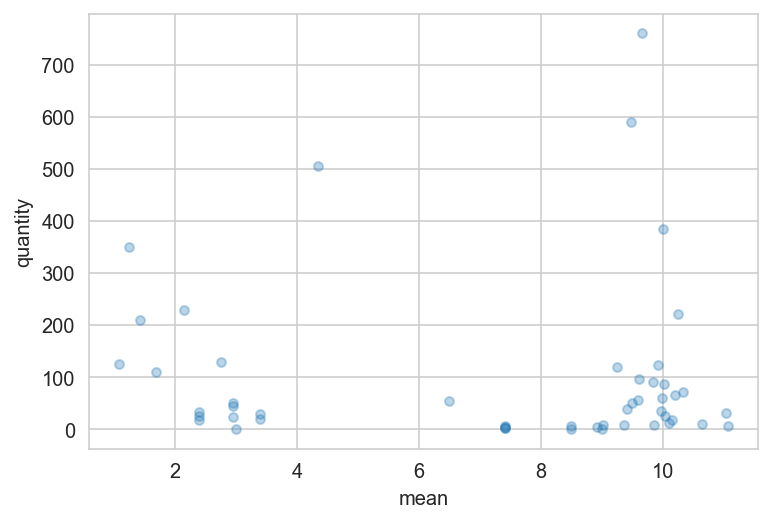

In [229]:
# A:
#subset = new_merge[['quantity','mean']]
#subset.plot(figsize=(20,8), kind='line',style={'ZN': 'g', 'INDUS':'b'});

new_merge.plot(kind='scatter', x='mean', y='quantity', alpha=0.3);

#### 9. Plot the max price of items against the count (popularity).

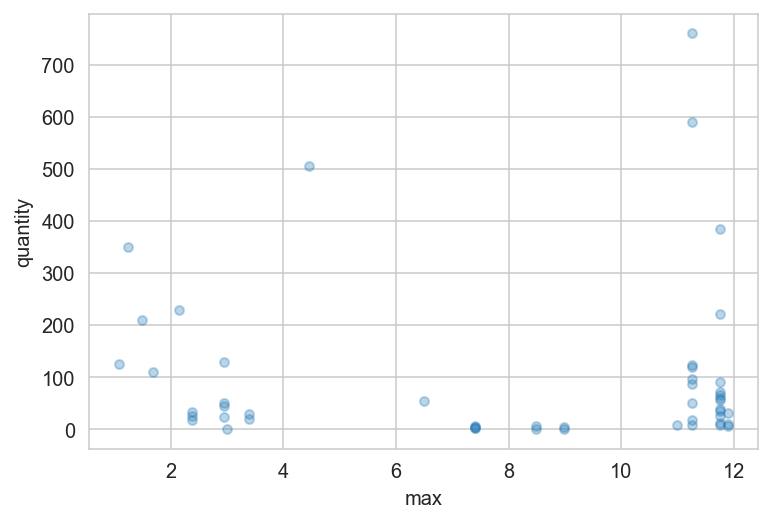

In [230]:
# A:
new_merge.plot(kind='scatter', x='max', y='quantity', alpha=0.3);

#### 10. [Challenge] Parse the `choice_description` column into two new columns: `order_customizations` and `order_customization_id`

Here is what your inputs and outputs would look like for a hypotheical section of the DataFrame (I'm just showing some of the columns to give you an idea of what the output format will be):

**Input:**

```python
                                  choice_description     item_name  order_id  \
0                                       [Clementine]          Izze         1   
1  [Red Salsa, [Black Beans, Guacamole, Sour Cream]]  Chicken Bowl         1   

   sub_order_id  
0             1  
1             2
```

**Output:**

```python
   order_customization_id order_customizations  \
0                       0           Clementine   
1                       0            Red Salsa   
2                       1          Black Beans   
3                       2            Guacamole   
4                       3           Sour Cream   

                                  choice_description     item_name  order_id  \
0                                       [Clementine]          Izze         1   
1  [Red Salsa, [Black Beans, Guacamole, Sour Cream]]  Chicken Bowl         1   
2  [Red Salsa, [Black Beans, Guacamole, Sour Cream]]  Chicken Bowl         1   
3  [Red Salsa, [Black Beans, Guacamole, Sour Cream]]  Chicken Bowl         1   
4  [Red Salsa, [Black Beans, Guacamole, Sour Cream]]  Chicken Bowl         1   

   sub_order_id  
0             1  
1             2  
2             2  
3             2  
4             2 
```

Hints:

- Remember you can write your own function and pass it into apply. In this case there will be one item per group, since we have to do this parsing for every row, but you may be able to get a solution with `.iterrows()` if you want to try that out.
- Within a function that you are passing into `.apply()`, you can create a _new DataFrame and return that._ This is one of the things that makes apply so powerful, since you can essentially perform any operations you want on a subset of your original DataFrame as long as you return DataFrames/groups that can be recombined.

**Note: the function may take awhile to complete. `apply` isn't that efficient with complicated custom operations per row like this.**

In [14]:
# A: